# Exercícios - Regressão 
Feito por Carlos Bravo

DRE: 119136241

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from seaborn import load_dataset
from scipy.stats import f
from sklearn.linear_model import Ridge

# Data Loading

In [2]:
# Load example csv file
example = pd.read_csv('example.csv')
example.describe()

,X,Y
count,10.000000,10.000000
mean,67.930122,134.100009
std,23.816200,47.273920
min,28.816847,60.854133
25%,54.919730,112.018526
50%,72.531281,137.157497
75%,81.134236,159.210882
max,99.958481,197.179636


In [3]:
# Load iris dataset
iris = load_dataset('iris')
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data Cleaning Analysis

O dataset de exemplo é pequeno o suficiente para vermos que não há duplicatas e que não há valores nulos, então não será feita sua limpeza. No entanto, precisamos verificar para o dataset iris.

In [4]:
# Check iris for duplicates
iris.duplicated().sum()

1

In [5]:
# Check iris for missing values
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<AxesSubplot:>

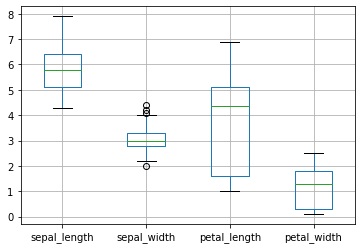

In [6]:
# Check iris for outliers
iris.boxplot()

Tem 1 duplicata no dataset, que precisa ser removida. Também é possível observar que o atributo 'sepal_width' possui 4 outliers. No entanto, como os outliers estão pertos das outras observações, não serão removidos.

## Data Cleaning

In [7]:
# Remove duplicate rows
iris = iris.drop_duplicates()
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Functions

In [8]:
# Linear regression using slides from class
def linear_regression_formula(X, y):
    mx = np.mean(X)
    my = np.mean(y)
    mxy = np.mean(X * y)
    mx2 = np.mean(X ** 2)
    theta1 = (mxy - mx * my) / (mx2 - mx ** 2)
    theta0 = (my * mx2 - mx * mxy) / (mx2 - mx ** 2)

    return theta0, theta1

In [9]:
# Calculate f-test
def f_test_2_variable(X, y, theta0, theta1):
    y_hat = theta0 + theta1 * X
    y_bar = np.mean(y)
    sse = np.sum((y - y_hat) ** 2)
    sst = np.sum((y - y_bar) ** 2)
    msr = (sst - sse) / 2
    mse = sse / (len(X) - 2)
    f_stat = msr / mse
    p_value = 1 - f.cdf(f_stat, 1, len(X) - 2)

    return f_stat, p_value

In [67]:
# Plot scatter plot and both regressions
def plot_scatter_and_regressions(X, y, xlabel, ylabel, title, hue=None):
    # Plot scatter plot of example data
    sns.scatterplot(x=X, y=y, hue=hue, palette='colorblind')

    # Plot linear regression formula
    theta0, theta1 = linear_regression_formula(X, y)
    predictions = theta0 + theta1 * X
    plt.plot(X, predictions, color='orange', linewidth=5)

    # Plot linear regression using sklearn
    model = LinearRegression()
    model.fit(X.values.reshape(-1, 1), y)
    plt.plot(X, model.predict(X.values.reshape(-1, 1)), color='blue')

    # Add labels
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Add title
    plt.title(title)

    # Print R^2
    r2 = model.score(X.values.reshape(-1, 1), y)
    print('R^2:', r2)

    # Print f-test 
    fresult = f_test_2_variable(X, y, theta0, theta1)
    print('F-test:', fresult[0])

    plt.show()

    return r2, fresult

## Graphics

In [23]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [25]:
alpha = 0.05
dfssr = 2
dfsse = len(iris) - dfssr
iris_critical_value = f.ppf(1 - alpha, dfssr, dfsse)

R^2: 0.9903992477649592
F-test: 412.63402013446824


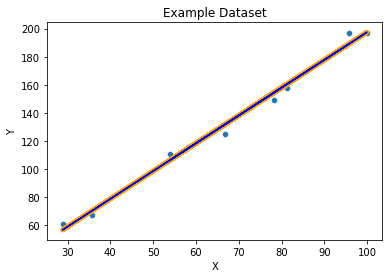

(0.9903992477649592, (412.63402013446824, 3.6052167029509974e-08))

In [68]:
# Plot example dataset
plot_scatter_and_regressions(example['X'], example['Y'], 'X', 'Y', 'Example Dataset')

R^2: 0.9269304912489391
F-test: 932.3915306301809


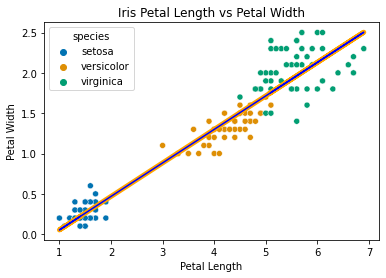

F-test passou


In [70]:
# Plot iris petal length vs petal width and check if f-test passed
results = plot_scatter_and_regressions(iris['petal_length'], iris['petal_width'], 'Petal Length', 'Petal Width', 'Iris Petal Length vs Petal Width', hue=iris['species'])

if results[1][0] > iris_critical_value:
    print('F-test passou')
else:
    print('F-test falhou')

R^2: 0.013954522574016193
F-test: 1.040172520102814


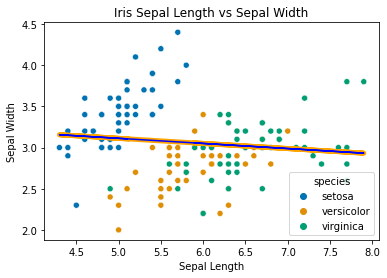

F-test falhou


In [71]:
# Plot iris sepal length vs sepal width and check if f-test passed
results = plot_scatter_and_regressions(iris['sepal_length'], iris['sepal_width'], 'Sepal Length', 'Sepal Width', 'Iris Sepal Length vs Sepal Width', hue=iris['species'])

if results[1][0] > iris_critical_value:
    print('F-test passou')
else:
    print('F-test falhou')

R^2: 0.7634183413499976
F-test: 237.1749712526765


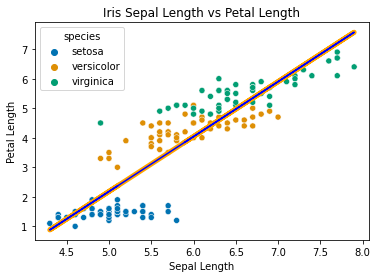

F-test passou


In [73]:
# Plot iris sepal length vs petal length and check if f-test passed
results = plot_scatter_and_regressions(iris['sepal_length'], iris['petal_length'], 'Sepal Length', 'Petal Length', 'Iris Sepal Length vs Petal Length', hue=iris['species'])

if results[1][0] > iris_critical_value:
    print('F-test passou')
else:
    print('F-test falhou')

R^2: 0.6734163998647145
F-test: 151.55722874496155


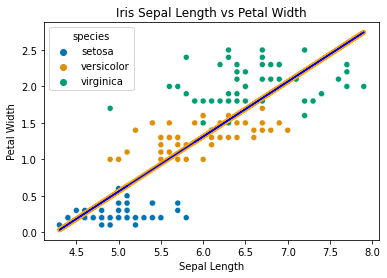

F-test passou


In [74]:
# Plot iris sepal length vs petal width and check if f-test passed
results = plot_scatter_and_regressions(iris['sepal_length'], iris['petal_width'], 'Sepal Length', 'Petal Width', 'Iris Sepal Length vs Petal Width', hue=iris['species'])

if results[1][0] > iris_critical_value:
    print('F-test passou')
else:
    print('F-test falhou')

R^2: 0.18150012215199696
F-test: 16.298425130185635


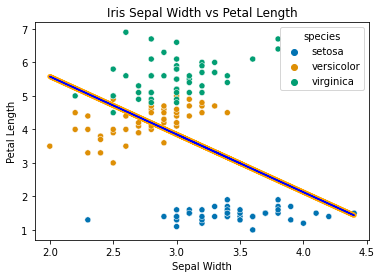

F-test passou


In [75]:
# Plot iris sepal width vs petal length and check if f-test passed
results = plot_scatter_and_regressions(iris['sepal_width'], iris['petal_length'], 'Sepal Width', 'Petal Length', 'Iris Sepal Width vs Petal Length', hue=iris['species'])

if results[1][0] > iris_critical_value:
    print('F-test passou')
else:
    print('F-test falhou')

R^2: 0.13169218335004673
F-test: 11.14740106057409


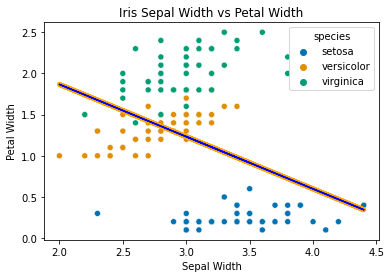

F-test passou


In [76]:
# Plot iris sepal width vs petal width and check if f-test passed
results = plot_scatter_and_regressions(iris['sepal_width'], iris['petal_width'], 'Sepal Width', 'Petal Width', 'Iris Sepal Width vs Petal Width', hue=iris['species'])

if results[1][0] > iris_critical_value:
    print('F-test passou')
else:
    print('F-test falhou')

A linha laranja teve seu tamanho aumentado para que seja possível visualizar melhor, pois as linhas estão sobrepostas. Isso se deve ao fato de que a regressões lineares estão retornando os mesmos coeficientes.

## Regressão Ridge

In [53]:
# Sample 10 random points from iris dataset
iris_sample = iris.sample(10)

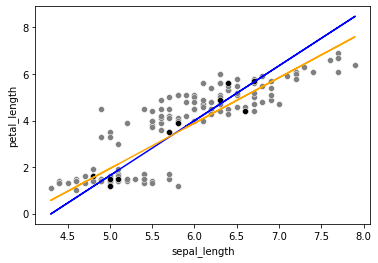

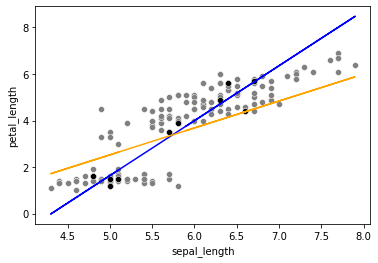

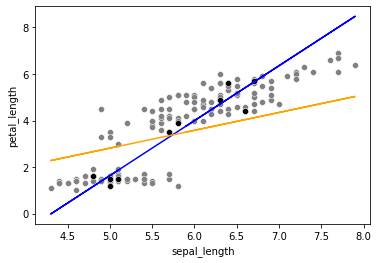

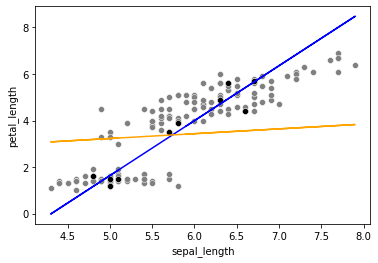

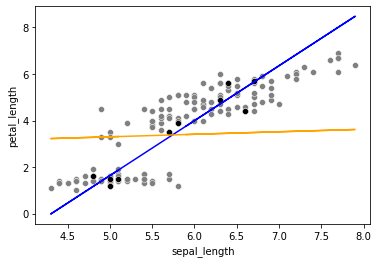

In [55]:
for alpha in [1,5,10,50,100]:
    # Plot iris sepal length vs petal length with different colors for sampled points
    sns.scatterplot(data=iris, x='sepal_length', y='petal_length', color='gray')
    sns.scatterplot(data=iris_sample, x='sepal_length', y='petal_length', color='black')

    # Plot sklearn linear regression using sampled points going through entire graph
    model = LinearRegression()
    model.fit(iris_sample[['sepal_length']], iris_sample['petal_length'])
    plt.plot(iris['sepal_length'], model.predict(iris[['sepal_length']]), color='blue')

    # Plot ridge regression using sampled points
    ridge = Ridge(alpha=alpha)
    ridge.fit(iris_sample[['sepal_length']], iris_sample['petal_length'])
    plt.plot(iris['sepal_length'], ridge.predict(iris[['sepal_length']]), color='orange')

    plt.show()


## Referências
1. GitHub Copilot
0. Documentação Pandas
0. Documentação SeaBorn
0. Documentação SciKit Learn
0. https://www.geeksforgeeks.org/how-to-perform-an-f-test-in-python/amp/
0. http://www.socr.ucla.edu/Applets.dir/F_Table.html
